Import the libraries needed for the analysis. 
While os and re are built-in libraries, basemap, numpy, pygrib, matplotlib and IPython have to be installed first.

In [1]:
import pygrib
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from mpl_toolkits.basemap import shiftgrid
import os
import re

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


As first step, we define the path of the folder where we have stored grib data.

In [2]:
os.chdir("/home/gloria/the-python-space-adventure/pollutants/20180926/pm2p5")

In [3]:
grib='z_cams_c_ecmf_20180926000000_prod_fc_sfc_024_pm2p5.grib' # Set the file name of your input GRIB file
grbs=pygrib.open(grib)

In [4]:
grb = grbs.select()[0]
data=grb.values * 1000000

In [5]:
lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) )
lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )
data, lons = shiftgrid(180., data, lons, start=False)

In [6]:

m=Basemap(projection='cyl', llcrnrlon=-180, \
  urcrnrlon=180.,llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
  resolution='c')



In [7]:
grid_lon, grid_lat = np.meshgrid(lons, lats) #regularly spaced 2D grid
x, y = m(grid_lon, grid_lat)

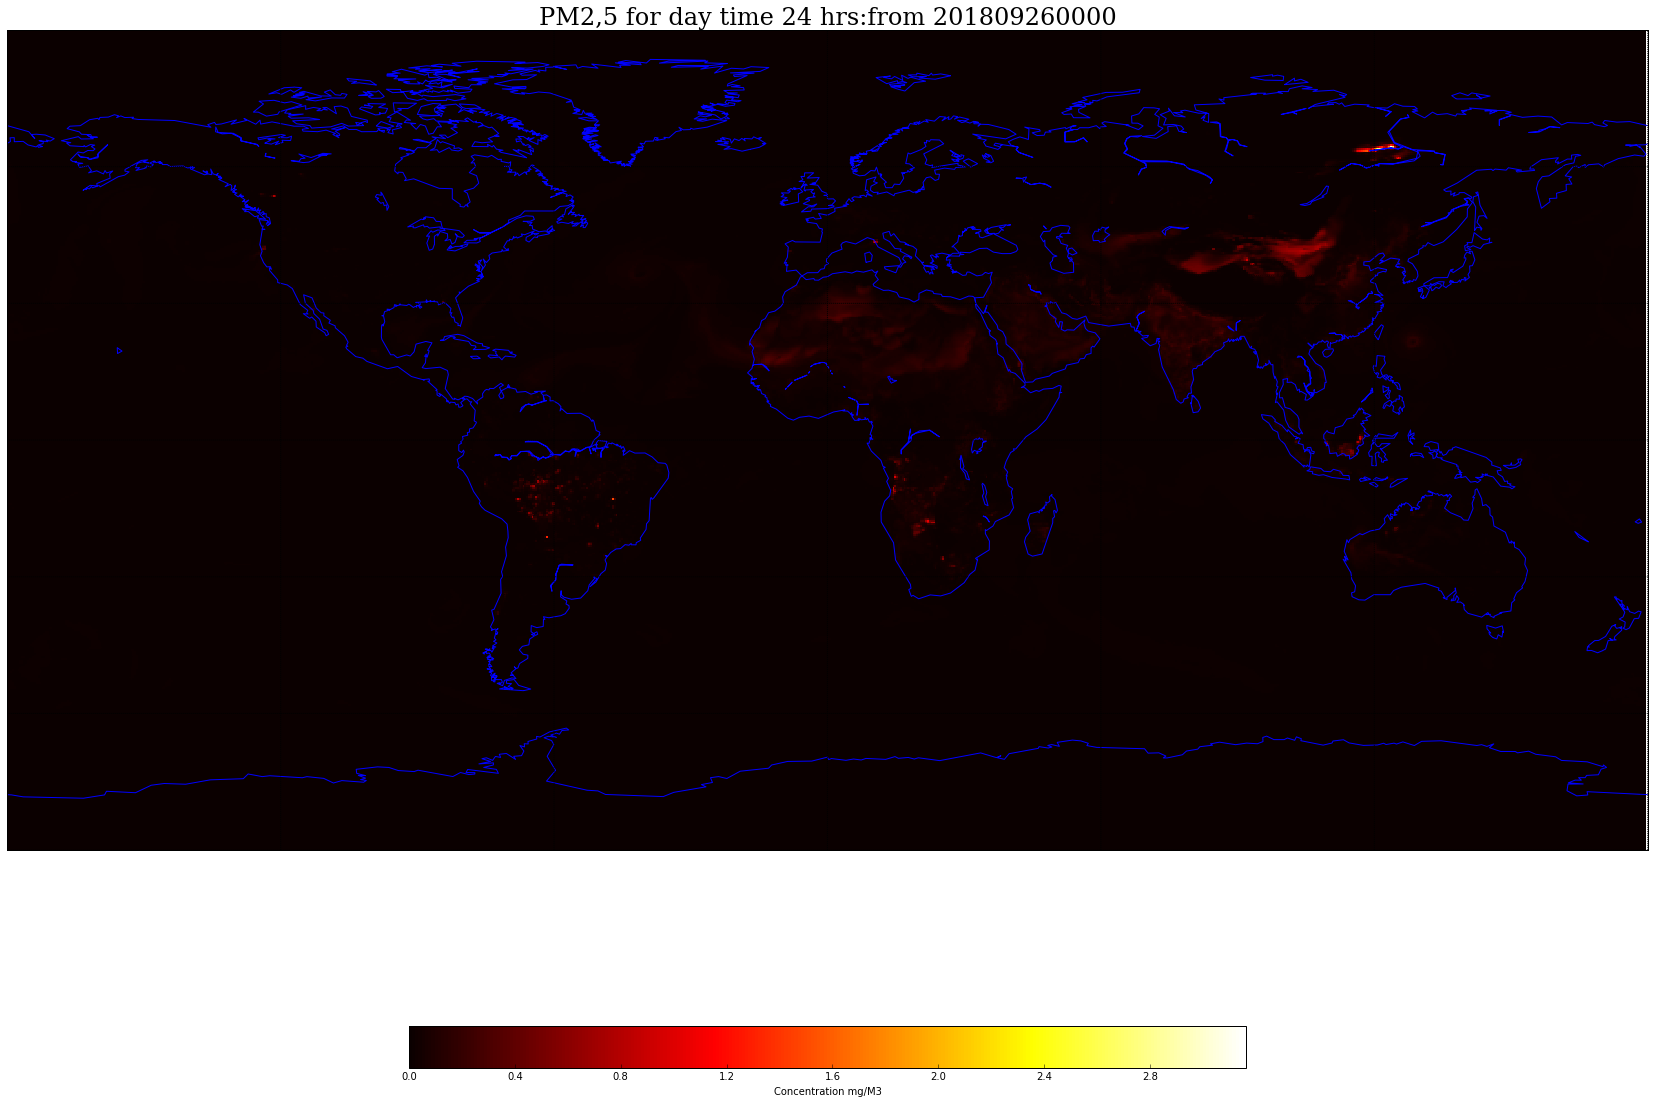

In [8]:
plt.figure(figsize=(30,21))
m.drawcoastlines(color = 'b')
m.drawmapboundary()
m.drawmeridians(np.arange(-180.,180.,60.))
m.drawparallels(np.arange(-90, 90, 30))

cmap = plt.get_cmap('hot')
cs = m.pcolormesh(x,y,data,shading='flat',cmap=cmap)
plt.colorbar(cs,orientation='horizontal', shrink=0.5, label = "Concentration mg/M3")

time = re.findall('(time [a-z0-9: ]*)', str(grb))
title = "PM2,5 for day " + time[0] 
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 24,
        }

plt.title(title, fontdict = font)


plt.show()

Creating animation and save it on a gif called 'animation_pm2p5.gif'.

<IPython.core.display.Javascript object>


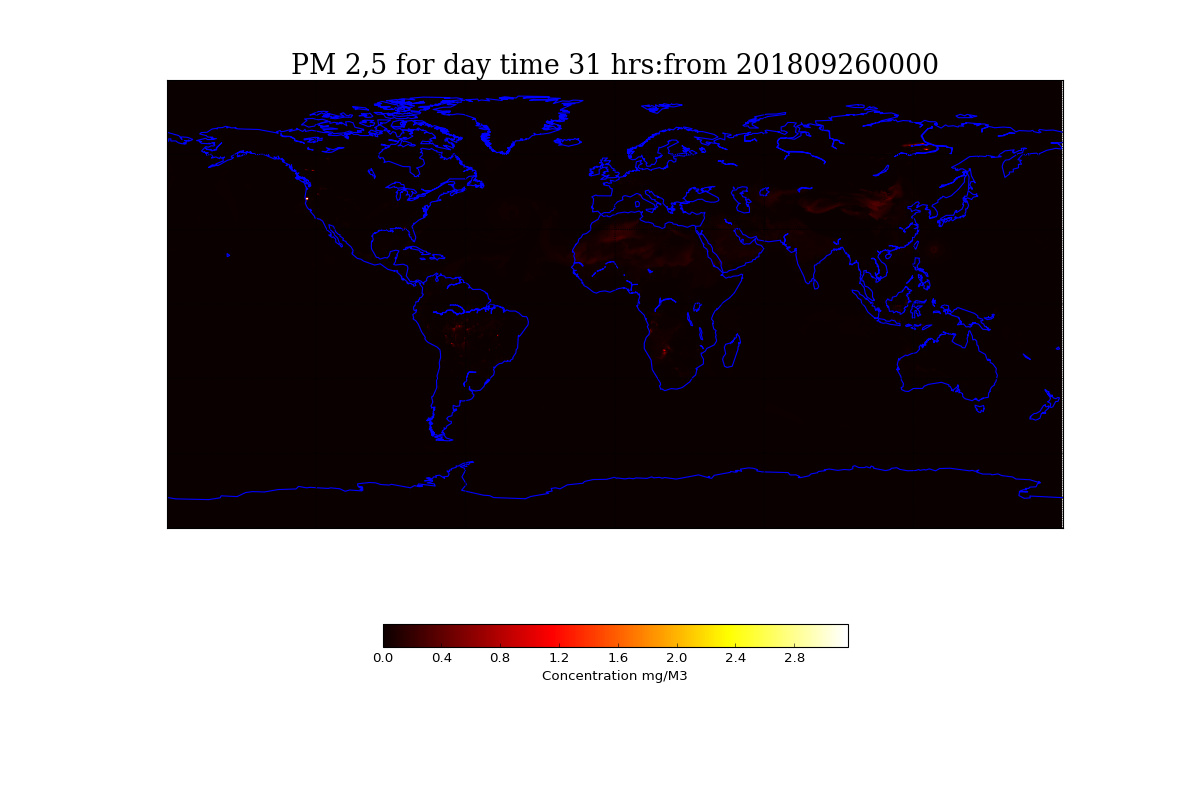

In [9]:
%matplotlib notebook

plt.figure(figsize=(15,10))
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

griblist = os.listdir("/home/gloria/the-python-space-adventure/pollutants/20180926/pm2p5")
levelist = []
for grb in sorted(griblist, key=numericalSort):
    grbs=pygrib.open(grb)
    for grb in grbs: levelist.append(grb)

        
grib='z_cams_c_ecmf_20180926000000_prod_fc_sfc_024_pm2p5.grib' # Set the file name of your input GRIB file
grbs=pygrib.open(grib)
for grb in grbs: grb
    
grb = grbs.select()[0]
data2=grb.values * 1000000
   
    

lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) )
lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )
data2, lons = shiftgrid(180., data2, lons, start=False)    
    
m = Basemap(projection='cyl', llcrnrlon=-180, \
    urcrnrlon=180.,llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
    resolution='c')

m.drawcoastlines(color = 'b')
m.drawmapboundary()
m.drawmeridians(np.arange(-180.,180.,60.))
m.drawparallels(np.arange(-90, 90, 30))

grid_lon, grid_lat = np.meshgrid(lons, lats) #regularly spaced 2D grid
x, y = m(grid_lon, grid_lat)

cmap = plt.get_cmap('hot')
cs = m.pcolormesh(x,y,data2,shading='flat',cmap=cmap)
plt.colorbar(cs,orientation='horizontal', shrink=0.5, label = "Concentration mg/M3")

def animate (i):
    grb = levelist[i]
    lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
    float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) )
    lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
    float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )
    
    data = grb.values * 1000000
    data, lons = shiftgrid(180., data, lons, start=False)
    grid_lon, grid_lat = np.meshgrid(lons, lats) #regularly spaced 2D grid
    x, y = m(grid_lon, grid_lat)
    cmap = plt.get_cmap('hot')
    cs = m.pcolormesh(x,y,data,shading='flat',cmap=cmap)
    time = re.findall('(time [0-9]*)', str(grb))
    time2 = re.findall('(time [a-z0-9: ]*)', str(grb))
    title = "PM 2,5 for day " + time2[0]
    plt.title(title, fontdict = font)

anim = animation.FuncAnimation(plt.gcf(), animate,
                               frames=len(levelist), interval=250)

anim.save('animation_pm2p5.gif', writer='imagemagick')


plt.show()




![](Copernicus_UV_data/data/animation_UV.gif )

In [10]:
from IPython.display import Image
Image(url='pollutants/20180926/pm2p5/animation_pm2p5.gif')

![](https://github.com/Randbee/Copernicus_UV_data/blob/master/data/animation_UV.gif)

![](https://github.com/Randbee/Copernicus_UV_data/blob/master/data/animation_UV.gif)